Part 1: Dataset Selection and Model Training 

Step 2: Data Analysis and Preprocessing 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import pickle

warnings.filterwarnings('ignore')

In [79]:
#Load Data Set

df = pd.read_csv(r"C:\Users\Manoj\Desktop\stramlit\boston.csv")

Exploratory Data Analysis (EDA)

In [80]:
# Basic information about the dataset
print("\n1. Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")


1. Dataset Info:
Shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [81]:
#Statistical Summary
print("\n2. Statistical Summary:")
print(df.describe())



2. Statistical Summary:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
st

#Check and handle missing values

In [82]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [83]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]

# Fill numeric missing with median
for col in numeric_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled NA in numeric '{col}' with median {median_val}")

# Fill categorical missing with most frequent
for col in cat_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled NA in categorical '{col}' with mode '{mode_val}'")

# Create visualisations

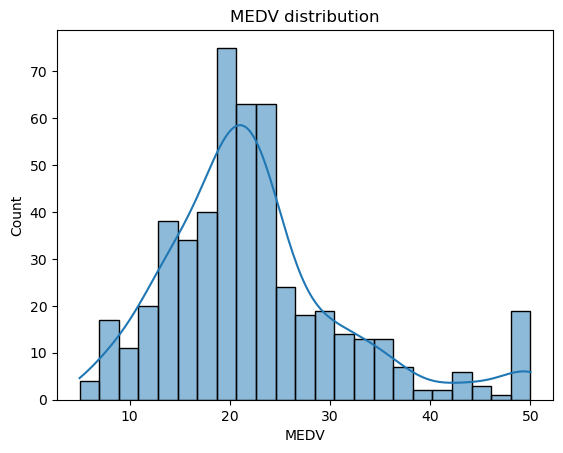

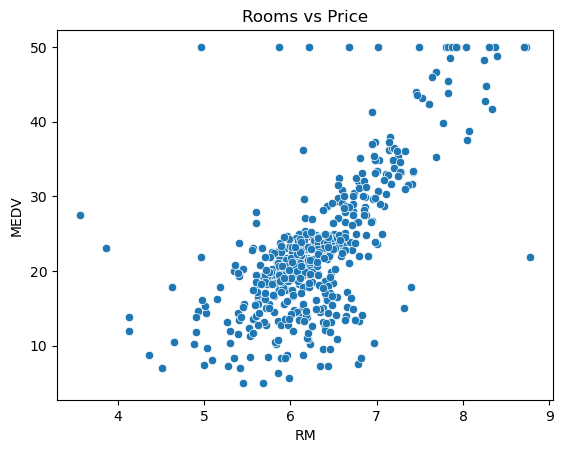

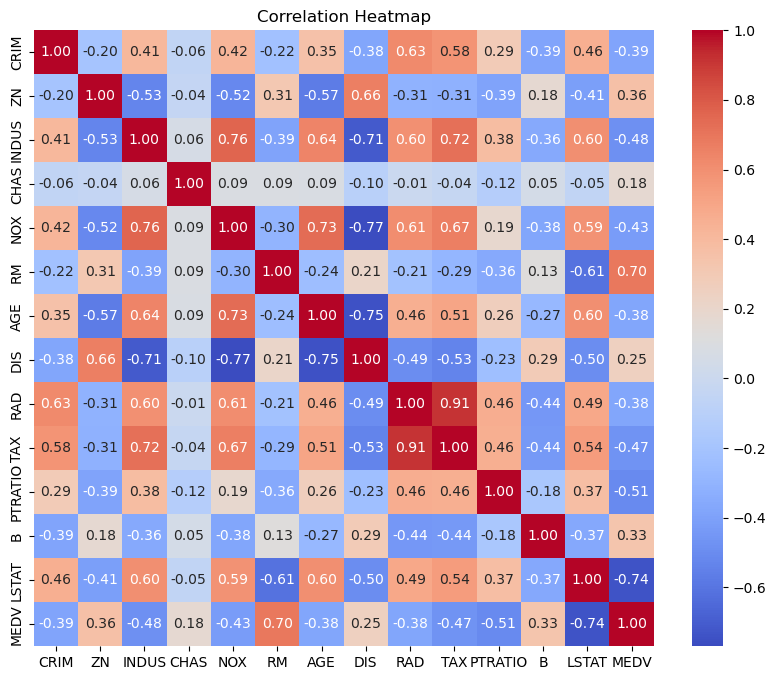

In [84]:
# Target distribution
sns.histplot(df['MEDV'], kde=True)
plt.title("MEDV distribution")
plt.show()

# Scatter plot: RM vs MEDV
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("Rooms vs Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature engineering 

In [85]:
# Detect skew in numeric columns
skewness = df.skew().abs().sort_values(ascending=False)
print("\nSkewness:\n", skewness)

# Apply log1p to skewed columns (except target)
skewed_cols = skewness[skewness > 0.75].index.tolist()
if 'MEDV' in skewed_cols:
    skewed_cols.remove('MEDV')

for col in skewed_cols:
    df[col] = np.log1p(df[col])
    print(f"Applied log1p transform to {col}")



Skewness:
 CRIM       5.223149
CHAS       3.405904
B          2.890374
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
PTRATIO    0.802325
NOX        0.729308
TAX        0.669956
AGE        0.598963
RM         0.403612
INDUS      0.295022
dtype: float64
Applied log1p transform to CRIM
Applied log1p transform to CHAS
Applied log1p transform to B
Applied log1p transform to ZN
Applied log1p transform to DIS
Applied log1p transform to RAD
Applied log1p transform to LSTAT
Applied log1p transform to PTRATIO


# Split data into training and testing sets

In [86]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (404, 13) (404,)
Test shapes: (102, 13) (102,)


# Step 3: Model Training

Train at least 2 different algorithms (e.g., Random Forest, Logistic Regression, SVM) 

In [87]:

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Models trained successfully: Linear Regression & Random Forest")

✅ Models trained successfully: Linear Regression & Random Forest


# Use cross-validation for model evaluation 


In [88]:
# Linear Regression cross-validation
lr_scores = cross_val_score(
    lr_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
lr_rmse = np.sqrt(-lr_scores)
print("Linear Regression RMSE for each fold:", lr_rmse)
print("Linear Regression Average RMSE:", lr_rmse.mean())

# Random Forest cross-validation
rf_scores = cross_val_score(
    rf_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
rf_rmse = np.sqrt(-rf_scores)
print("\nRandom Forest RMSE for each fold:", rf_rmse)
print("Random Forest Average RMSE:", rf_rmse.mean())

Linear Regression RMSE for each fold: [3.60591589 4.35321801 5.00477506 7.70743839 3.73403034]
Linear Regression Average RMSE: 4.881075538424346

Random Forest RMSE for each fold: [2.79550649 3.6405907  4.53585426 6.80936211 4.24208189]
Random Forest Average RMSE: 4.404679087323769


# Compare model performance using appropriate metrics

In [89]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Linear Regression metrics
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression → R²:", lr_r2, " | RMSE:", lr_rmse_test)

# Random Forest metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest → R²:", rf_r2, " | RMSE:", rf_rmse_test)

# Compare
if rf_r2 > lr_r2:
    print("\n✅ Random Forest performs better based on R².")
else:
    print("\n✅ Linear Regression performs better based on R².")

Linear Regression → R²: 0.7477753353318387  | RMSE: 4.300766079021284
Random Forest → R²: 0.8917400219548827  | RMSE: 2.8176432980244255

✅ Random Forest performs better based on R².


# Select the best-performing model

In [91]:
# Select best model based on R²
if rf_r2 > lr_r2:
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = lr_model
    best_model_name = "Linear Regression"

print(f"\nBest model selected: {best_model_name}")



Best model selected: Random Forest


# Select the best-performing model 

In [92]:
# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ {best_model_name} saved as best_model.pkl")


✅ Random Forest saved as best_model.pkl


# **************************************Part 2: Streamlit Application Development ********************************

# **************************************Part 2: Streamlit Application Development ********************************